test 2D optimisation

In [1]:
import numpy as np
from boss.bo.bo_main import BOMain

In [2]:
import matplotlib.pyplot as plt

optimisation setup:

In [3]:
seed = 260422
normalise_scale = True  # note: default is false
num_iter = 20

utilities:

In [4]:
import GPy

In [5]:
def load_model(filename):

    # load saved data
    saved=np.load(filename)
    dim=saved['X'].shape[1]

    # create kernel
    k=GPy.kern.StdPeriodic(input_dim=dim,ARD1=True,ARD2=True)

    # create mean function
    mf=GPy.mappings.Constant(dim,1)

    # create model
    m=GPy.models.GPRegression(saved['X'],saved['Y'],kernel=k,mean_function=mf)

    # set model params
    m[:]=saved['params']
    m.fix()
    m.parameters_changed()

    return m

optimisation task 0:

In [6]:
unknown_model_0 = load_model('../models/model_2D_E0.npz')
bounds = [[-50.0, 310.0]]*2
yrange = [0, 20]

In [7]:
def f(x):
    return unknown_model_0.predict(np.atleast_2d(x))[0]

plot:

In [8]:
xp = np.linspace(-50, 310, 361)
levels = 25

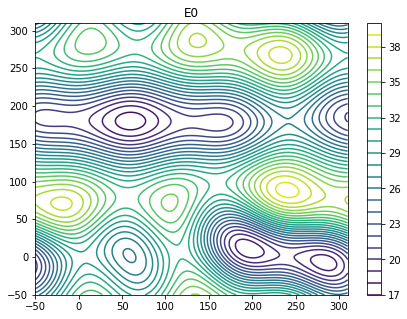

In [9]:
x1, x2 = np.meshgrid(xp,xp)
yp = f(np.column_stack((x1.ravel(),x2.ravel())))
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.title('E0');

optimisation:

In [10]:
bo_1 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=5,
    iterpts=num_iter,
    ynorm=normalise_scale,
    seed=seed
)

In [11]:
%time res_1 = bo_1.run()

CPU times: user 22.6 s, sys: 375 ms, total: 23 s
Wall time: 22.3 s


best observed value:

In [12]:
[res_1.xbest, res_1.ybest]

[array([ 55.32464724, 184.55971936]), 17.594752042167297]

estimated minimum and predicted minimum value:

In [13]:
[res_1.xmin, res_1.fmin]

[array([ 59.85392088, 181.41748042]), 17.53820055942954]

evaluate estimated minimum:

In [14]:
f(res_1.xmin)

array([[17.48800437]])

plot:

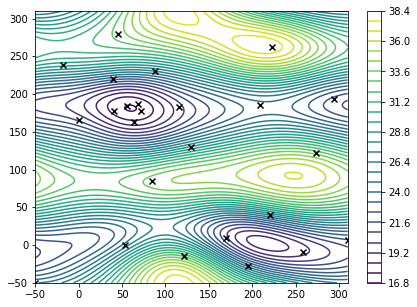

In [15]:
yp = bo_1.model.predict(np.column_stack((x1.ravel(),x2.ravel())))[0]
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_1.model.X[:,0],bo_1.model.X[:,1], marker='x', color='k', zorder=10);

In [16]:
bo_2 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=5,
    iterpts=num_iter,
    acqfn_name='ei',
    ynorm=normalise_scale,
    seed=seed
)

In [17]:
%time res_2 = bo_2.run()

CPU times: user 18.4 s, sys: 352 ms, total: 18.7 s
Wall time: 17.6 s


In [18]:
[res_2.xbest, res_2.ybest]

[array([ 60.59318601, 182.47979046]), 17.504091803441465]

In [19]:
[res_2.xmin, res_2.fmin]

[array([ 59.26701432, 180.2423965 ]), 17.483315889325443]

evaluate estimated minimum:

In [20]:
f(res_2.xmin)

array([[17.4820744]])

plot:

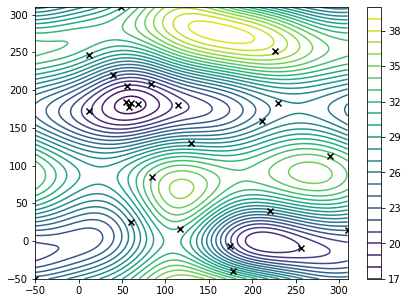

In [21]:
yp = bo_2.model.predict(np.column_stack((x1.ravel(),x2.ravel())))[0]
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_2.model.X[:,0],bo_2.model.X[:,1], marker='x', color='k', zorder=10);

see model params:

In [22]:
bo_1.model.get_all_params()

{'noise': 1e-12,
 'variance': 0.10729712972073221,
 'lengthscales': [0.6945487327062875, 0.37003643235270606],
 'periods': [360.0, 360.0]}

In [23]:
bo_2.model.get_all_params()

{'noise': 1e-12,
 'variance': 0.1355776263115629,
 'lengthscales': [0.6654866482424069, 0.48051275537381444],
 'periods': [360.0, 360.0]}

optimisation task 1:

In [24]:
unknown_model_1=load_model('../models/model_2D_E1.npz')
bounds=[[-50.0, 310.0]]*2
yrange = [0, 1]

In [25]:
def f(x):
    return unknown_model_1.predict(np.atleast_2d(x))[0]

plot:

In [26]:
xp = np.linspace(-50, 310, 361)
levels = 25

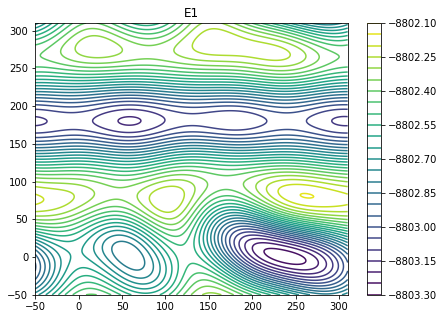

In [27]:
x1, x2 = np.meshgrid(xp,xp)
yp = f(np.column_stack((x1.ravel(),x2.ravel())))
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.title('E1');

optimisation:

In [28]:
bo_3 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=5,
    iterpts=num_iter,
    ynorm=normalise_scale,
    seed=seed
)

In [29]:
%time res_3 = bo_3.run()

CPU times: user 7.98 s, sys: 284 ms, total: 8.26 s
Wall time: 7.06 s


In [30]:
[res_3.xbest, res_3.ybest]

[array([239.89420083,  -0.24078021]), -8803.276786468752]

In [31]:
[res_3.xmin, res_3.fmin]

[array([237.04888836,   1.26273502]), -8803.277755977912]

evaluate estimated minimum:

In [32]:
f(res_3.xmin)

array([[-8803.27704205]])

plot:

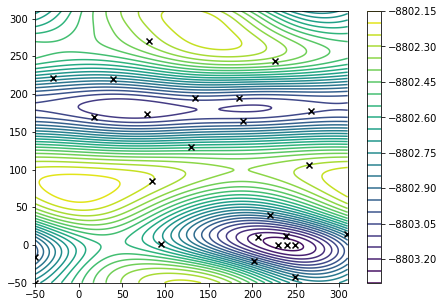

In [33]:
yp = bo_3.model.predict(np.column_stack((x1.ravel(),x2.ravel())))[0]
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_3.model.X[:,0],bo_3.model.X[:,1], marker='x', color='k', zorder=10);

In [34]:
bo_4 = BOMain(
    f, 
    bounds,
    yrange=yrange,
    kernel='stdp',
    initpts=5,
    iterpts=num_iter,
    acqfn_name='ei',
    ynorm=normalise_scale,
    seed=seed
)

In [35]:
%time res_4 = bo_4.run()

CPU times: user 7.38 s, sys: 297 ms, total: 7.67 s
Wall time: 6.35 s


In [36]:
[res_4.xbest, res_4.ybest]

[array([239.34518096,   0.35984324]), -8803.276941409127]

In [37]:
[res_4.xmin, res_4.fmin]

[array([236.968777  ,   0.68530706]), -8803.277195565719]

evaluate estimated minimum:

In [38]:
f(res_4.xmin)

array([[-8803.27710016]])

plot:

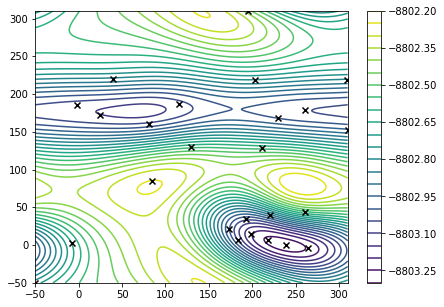

In [39]:
yp = bo_4.model.predict(np.column_stack((x1.ravel(),x2.ravel())))[0]
plt.figure(figsize=(7,5))
cset = plt.contour(xp, xp, yp.reshape(len(xp),len(xp)), levels=levels)
plt.colorbar(cset)
plt.scatter(bo_4.model.X[:,0],bo_4.model.X[:,1], marker='x', color='k', zorder=10);

see model params:

In [40]:
bo_3.model.get_all_params()

{'noise': 1e-12,
 'variance': 0.1281378308955755,
 'lengthscales': [1.0213083177691125, 0.36610051759361756],
 'periods': [360.0, 360.0]}

In [41]:
bo_4.model.get_all_params()

{'noise': 1e-12,
 'variance': 0.13405525024402634,
 'lengthscales': [0.6543094793391804, 0.38321062634796693],
 'periods': [360.0, 360.0]}